<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Cleaning</a></span></li></ul></div>

## Data Cleaning

In [1]:
import pandas as pd
import numpy as np

#data= pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt")
data=pd.read_pickle('.DateTime_transformed.pickle')
print(data.shape)
print(data.columns)
data.head()

(205963, 10)
Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DESC',
       'ENTRIES',
       'EXITS                                                               ',
       'datetime'],
      dtype='object')


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,datetime
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7107725,2407457,2019-06-22 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7107738,2407465,2019-06-22 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7107761,2407491,2019-06-22 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7107858,2407541,2019-06-22 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7108075,2407581,2019-06-22 16:00:00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205963 entries, 0 to 205962
Data columns (total 10 columns):
C/A                                                                     205963 non-null object
UNIT                                                                    205963 non-null object
SCP                                                                     205963 non-null object
STATION                                                                 205963 non-null object
LINENAME                                                                205963 non-null object
DIVISION                                                                205963 non-null object
DESC                                                                    205963 non-null object
ENTRIES                                                                 205963 non-null int64
EXITS                                                                   205963 non-null int64
datetime                            

In [4]:
data["STATION"].value_counts()

34 ST-PENN STA     4215
FULTON ST          4038
23 ST              3107
GRD CNTRL-42 ST    2810
86 ST              2637
CANAL ST           2477
34 ST-HERALD SQ    2333
CHAMBERS ST        2290
59 ST              2188
42 ST-PORT AUTH    2185
28 ST              2124
TIMES SQ-42 ST     2113
WALL ST            2090
ATL AV-BARCLAY     2032
14 ST              1974
125 ST             1897
PATH NEW WTC       1796
59 ST COLUMBUS     1736
14 ST-UNION SQ     1691
CORTLANDT ST       1651
47-50 STS ROCK     1566
161/YANKEE STAD    1562
CHURCH AV          1554
96 ST              1548
METS-WILLETS PT    1512
JAY ST-METROTEC    1512
50 ST              1504
WTC-CORTLANDT      1470
LEXINGTON AV/53    1355
BOWLING GREEN      1310
                   ... 
ALLERTON AV         126
PARKSIDE AV         126
INTERVALE AV        126
NEPTUNE AV          126
65 ST               126
HARLEM 148 ST       126
21 ST               126
SHEPHERD AV         126
GATES AV            126
KOSCIUSZKO ST       126
NEW LOTS        

In [5]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
205933    False
205934    False
205935    False
205936    False
205937    False
205938    False
205939    False
205940    False
205941    False
205942    False
205943    False
205944    False
205945    False
205946    False
205947    False
205948    False
205949    False
205950    False
205951    False
205952    False
205953    False
205954    False
205955    False
205956    False
205957    False
205958    False
205959    False
205960    False
205961    False
205962    False
Length: 205963, dtype: b

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ENTRIES,205963.0,4.199277e+07,2.130875e+08,0.0,274341.0,2118270.0,6697791.0,2.129237e+09
EXITS,205963.0,3.430355e+07,1.962695e+08,0.0,102406.5,1205918.0,4592071.5,2.123981e+09


In [7]:
# Remove the extra white spaces in the columns
data.columns = data.columns.str.strip()
data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DESC',
       'ENTRIES', 'EXITS', 'datetime'],
      dtype='object')

In [8]:
data["DESC"].value_counts()

REGULAR       205207
RECOVR AUD       756
Name: DESC, dtype: int64

In [9]:
test1= data[data["DESC"]=="RECOVR AUD"]
test1.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,datetime
1304,A010,R080,00-00-05,57 ST-7 AV,NQRW,BMT,RECOVR AUD,1622559,477538,2019-06-22 08:00:00
8122,A049,R088,02-00-00,CORTLANDT ST,RNW,BMT,RECOVR AUD,774097,1063570,2019-06-24 21:00:00
8165,A049,R088,02-00-01,CORTLANDT ST,RNW,BMT,RECOVR AUD,856800,707445,2019-06-24 21:00:00
8208,A049,R088,02-00-02,CORTLANDT ST,RNW,BMT,RECOVR AUD,834334,506470,2019-06-24 21:00:00
8251,A049,R088,02-00-03,CORTLANDT ST,RNW,BMT,RECOVR AUD,872365011,871604578,2019-06-24 21:00:00
8294,A049,R088,02-01-00,CORTLANDT ST,RNW,BMT,RECOVR AUD,877337,1453742,2019-06-24 21:00:00
8337,A049,R088,02-01-01,CORTLANDT ST,RNW,BMT,RECOVR AUD,126025,177980,2019-06-24 21:00:00
8380,A049,R088,02-01-02,CORTLANDT ST,RNW,BMT,RECOVR AUD,1486129,1710643,2019-06-24 21:00:00
8423,A049,R088,02-03-00,CORTLANDT ST,RNW,BMT,RECOVR AUD,1458421,244993,2019-06-24 21:00:00
8466,A049,R088,02-03-01,CORTLANDT ST,RNW,BMT,RECOVR AUD,1020227,252894,2019-06-24 21:00:00


In [10]:
data.iloc[1300:1307]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,datetime
1300,A010,R080,00-00-04,57 ST-7 AV,NQRW,BMT,REGULAR,4390969,2183783,2019-06-28 16:00:00
1301,A010,R080,00-00-04,57 ST-7 AV,NQRW,BMT,REGULAR,4391578,2183885,2019-06-28 20:00:00
1302,A010,R080,00-00-05,57 ST-7 AV,NQRW,BMT,REGULAR,1622466,477513,2019-06-22 00:00:00
1303,A010,R080,00-00-05,57 ST-7 AV,NQRW,BMT,REGULAR,1622525,477516,2019-06-22 04:00:00
1304,A010,R080,00-00-05,57 ST-7 AV,NQRW,BMT,RECOVR AUD,1622559,477538,2019-06-22 08:00:00
1305,A010,R080,00-00-05,57 ST-7 AV,NQRW,BMT,REGULAR,1622770,477636,2019-06-22 12:00:00
1306,A010,R080,00-00-05,57 ST-7 AV,NQRW,BMT,REGULAR,1623184,477739,2019-06-22 16:00:00


In [12]:
data["datetime"].unique()

array(['2019-06-22T00:00:00.000000000', '2019-06-22T04:00:00.000000000',
       '2019-06-22T08:00:00.000000000', ...,
       '2019-06-27T22:48:53.000000000', '2019-06-27T22:51:38.000000000',
       '2019-06-27T22:52:59.000000000'], dtype='datetime64[ns]')

In [13]:
data[data["STATION"]=="59 ST"].tail(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,datetime
163325,R245A,R051,01-06-01,59 ST,456NQRW,IRT,REGULAR,117477428,485311,2019-06-27 08:00:00
163326,R245A,R051,01-06-01,59 ST,456NQRW,IRT,REGULAR,117477444,485602,2019-06-27 12:00:00
163327,R245A,R051,01-06-01,59 ST,456NQRW,IRT,REGULAR,117477463,486015,2019-06-27 16:00:00
163328,R245A,R051,01-06-01,59 ST,456NQRW,IRT,REGULAR,117477533,486705,2019-06-27 20:00:00
163329,R245A,R051,01-06-01,59 ST,456NQRW,IRT,REGULAR,117477542,486774,2019-06-28 00:00:00
163330,R245A,R051,01-06-01,59 ST,456NQRW,IRT,REGULAR,117477547,486780,2019-06-28 04:00:00
163331,R245A,R051,01-06-01,59 ST,456NQRW,IRT,REGULAR,117477549,486808,2019-06-28 08:00:00
163332,R245A,R051,01-06-01,59 ST,456NQRW,IRT,REGULAR,117477559,487054,2019-06-28 12:00:00
163333,R245A,R051,01-06-01,59 ST,456NQRW,IRT,REGULAR,117477583,487414,2019-06-28 16:00:00
163334,R245A,R051,01-06-01,59 ST,456NQRW,IRT,REGULAR,117477640,487861,2019-06-28 20:00:00


In [14]:
test= data[data["STATION"]=="34 ST-PENN STA"]
test
# Combine with Linemame and change the name of the stations

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,datetime
52746,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,36920,117707,2019-06-22 00:00:00
52747,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,36938,117728,2019-06-22 04:00:00
52748,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,36975,117837,2019-06-22 08:00:00
52749,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,37067,118135,2019-06-22 12:00:00
52750,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,37228,118440,2019-06-22 16:00:00
52751,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,37420,118797,2019-06-22 20:00:00
52752,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,37522,118938,2019-06-23 00:00:00
52753,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,37532,118964,2019-06-23 04:00:00
52754,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,37573,119040,2019-06-23 08:00:00
52755,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,37671,119330,2019-06-23 12:00:00


In [ ]:
#data[data["DESC"] == "RECOVR AUD"]
#data.iloc[13:50]
#Only keep the Desc= Reg
#data = data[data["DESC"] != "RECOVR AUD"].reset_index()

In [15]:
data["DESC"].value_counts()

REGULAR       205207
RECOVR AUD       756
Name: DESC, dtype: int64

In [ ]:
data.head()

In [16]:
print(data["DIVISION"].value_counts())
print(data["DESC"].value_counts())


IRT    75016
IND    72659
BMT    42989
PTH    13392
SRT     1419
RIT      488
Name: DIVISION, dtype: int64
REGULAR       205207
RECOVR AUD       756
Name: DESC, dtype: int64


In [17]:
# Drop columns that don't add value to the analysis
data = data.drop(labels = ["DIVISION","DESC"], axis = 1)
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,ENTRIES,EXITS,datetime
0,A002,R051,02-00-00,59 ST,NQR456W,7107725,2407457,2019-06-22 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,7107738,2407465,2019-06-22 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,7107761,2407491,2019-06-22 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,7107858,2407541,2019-06-22 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,7108075,2407581,2019-06-22 16:00:00


In [ ]:
data["TIME"].value_counts()

In [ ]:

data["TIME"].unique()

In [ ]:
data.head()

In [19]:
cols_diff= ["ENTRIES","EXITS"]
cols_add = ["TURNSTILE_ENTRIES","TURNSTILE_EXITS"]
data[cols_add] = data.groupby(by =["STATION","C/A","SCP","LINENAME"])[cols_diff].diff()
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,ENTRIES,EXITS,datetime,TURNSTILE_ENTRIES,TURNSTILE_EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,7107725,2407457,2019-06-22 00:00:00,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,7107738,2407465,2019-06-22 04:00:00,13.0,8.0
2,A002,R051,02-00-00,59 ST,NQR456W,7107761,2407491,2019-06-22 08:00:00,23.0,26.0
3,A002,R051,02-00-00,59 ST,NQR456W,7107858,2407541,2019-06-22 12:00:00,97.0,50.0
4,A002,R051,02-00-00,59 ST,NQR456W,7108075,2407581,2019-06-22 16:00:00,217.0,40.0


In [20]:
show= data[data["TURNSTILE_ENTRIES"] < 0]
show.head()

,C/A,UNIT,SCP,STATION,LINENAME,ENTRIES,EXITS,datetime,TURNSTILE_ENTRIES,TURNSTILE_EXITS
3261,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,1238274181,1813358198,2019-06-22 04:00:00,-260.0,37.0
3262,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,1238274092,1813358285,2019-06-22 08:00:00,-89.0,87.0
3263,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,1238273859,1813358522,2019-06-22 12:00:00,-233.0,237.0
3264,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,1238273368,1813358866,2019-06-22 16:00:00,-491.0,344.0
3265,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,1238272663,1813359224,2019-06-22 20:00:00,-705.0,358.0


In [21]:
data[3259:3265]

,C/A,UNIT,SCP,STATION,LINENAME,ENTRIES,EXITS,datetime,TURNSTILE_ENTRIES,TURNSTILE_EXITS
3259,A025,R023,01-03-00,34 ST-HERALD SQ,BDFMNQRW,7445191,2784560,2019-06-28 20:00:00,1450.0,458.0
3260,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,1238274441,1813358161,2019-06-22 00:00:00,NaN,NaN
3261,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,1238274181,1813358198,2019-06-22 04:00:00,-260.0,37.0
3262,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,1238274092,1813358285,2019-06-22 08:00:00,-89.0,87.0
3263,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,1238273859,1813358522,2019-06-22 12:00:00,-233.0,237.0
3264,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,1238273368,1813358866,2019-06-22 16:00:00,-491.0,344.0


In [22]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ENTRIES,205963.0,4.199277e+07,2.130875e+08,0.0,274341.0,2118270.0,6697791.0,2.129237e+09
EXITS,205963.0,3.430355e+07,1.962695e+08,0.0,102406.5,1205918.0,4592071.5,2.123981e+09
TURNSTILE_ENTRIES,201083.0,-1.236230e+03,2.598470e+06,-867827527.0,9.0,74.0,239.0,7.665461e+08
TURNSTILE_EXITS,201083.0,-1.381419e+01,1.191163e+06,-335524745.0,8.0,54.0,168.0,3.355249e+08


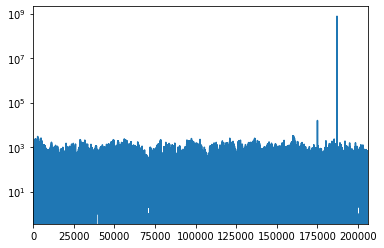

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
data.TURNSTILE_ENTRIES.plot()
plt.yscale("log")
#hmmm why are there the weird ones??

In [ ]:
#COnvert time and Date to be able to work with it
f="%m/%d/%Y%H:%M:%S"
data["TIME_STAMP"] = pd.to_datetime(data["DATE"]+data["TIME"],format =f)
data["DATE"] = pd.to_datetime(data["DATE"], format ="%m/%d/%Y")
# Create column with day of the week
data['DAY'] = data['DATE'].dt.day_name()
print(data.dtypes)
data.head()


In [ ]:
# Some visuals to see what is going on
import matplotlib.pyplot as plt
#top_20_stations_exits = data.groupby(by = ["STATION","LINENAME"])["TURNSTILE_EXITS"].sum().reset_index()
daily_riders= data.groupby(by = ["STATION","LINENAME"])["TURNSTILE_ENTRIES","TURNSTILE_EXITS"].sum().reset_index()
daily_riders

In [ ]:
top_stations= daily_riders.sort_values(by =["TURNSTILE_EXITS"],ascending= False)
top_20_stations =top_stations[:20]
top_20_stations

In [ ]:

# Create column with day of the week
data['DAY'] = data['DATE'].dt.day_name()
data.head()

